# 1.Import the libraries


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats 

# 2.Create the Database


In [7]:
# Set the random seed for reproducibility 
np.random.seed(42)

# Create a synthetic Dataset
data = {
    'product_id':range(1, 21),
    'product_name':[f'Product{i}' for i in range(1, 21)],
    'category':np.random.choice(['Electronics','Clothing','Home', 'Sports'],20),
    'units_sold':np.random.poisson(lam=20, size=20),# poisson distribution for sales
    'sale_date':pd.date_range(start='2025-01-01',periods=20,freq='D')
}
sales_data = pd.DataFrame(data)

#Display the first few rows of the dataset 
print('Sales Data :',sales_data)

Sales Data :     product_id product_name     category  units_sold  sale_date
0            1     Product1         Home          25 2025-01-01
1            2     Product2       Sports          15 2025-01-02
2            3     Product3  Electronics          17 2025-01-03
3            4     Product4         Home          19 2025-01-04
4            5     Product5         Home          21 2025-01-05
5            6     Product6       Sports          17 2025-01-06
6            7     Product7  Electronics          19 2025-01-07
7            8     Product8  Electronics          16 2025-01-08
8            9     Product9         Home          21 2025-01-09
9           10    Product10     Clothing          21 2025-01-10
10          11    Product11         Home          17 2025-01-11
11          12    Product12         Home          22 2025-01-12
12          13    Product13         Home          14 2025-01-13
13          14    Product14         Home          17 2025-01-14
14          15    Product15

In [8]:
#Sales data to csv file 
sales_data.to_csv('Sales_data.csv', index =False)

In [9]:
# Path location 
import os 
os.getcwd()

'/Users/varadpendkar/Documents/Github_uploaded*/APR/15thapr'

# 3.Descriptive Statistics


In [16]:
# Descriptive statistics 
descriptive_statistics = sales_data['units_sold'].describe()
# Display the descriptive statistics 
print('\nDescriptive Statistics for Units Sold is :',descriptive_statistics)

# Additional statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
standard_deviation_sales = sales_data['units_sold'].std()

# Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns = ['Category','Total Units sold','Average Units sold','Std Dev of Units sold']

# Display the results
print('\nStatistical Analysis:')
print(f'Mean units sold: {mean_sales}')
print(f'Median units sold: {median_sales}')
print(f'Mode units sold: {mode_sales}')
print(f'Variance of units sold: {variance_sales}')
print(f'Standard Deviation of units sold : {standard_deviation_sales}')
print('\nCategory statistics')
print(category_stats)


Descriptive Statistics for Units Sold is : count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean units sold: 18.8
Median units sold: 18.5
Mode units sold: 17
Variance of units sold: 10.90526315789474
Standard Deviation of units sold : 3.3023117899275864

Category statistics
      Category  Total Units sold  Average Units sold  Std Dev of Units sold
0     Clothing                21           21.000000                    NaN
1  Electronics                73           18.250000               2.217356
2         Home               181           20.111111               3.723051
3       Sports               101           16.833333               2.714160


# 4.Inferential Statistics


In [23]:
# Confidence Interval for the mean of units sold 
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold']) - 1
sample_mean = mean_sales
sample_standard_error = standard_deviation_sales / np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level 
t_score = stats.t.ppf((1 + confidence_level)/ 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval =(sample_mean - margin_of_error, sample_mean + margin_of_error)
print('\nConfidence Interval for the Mean of Units Sold:',confidence_interval)


Confidence Interval for the Mean of Units Sold: (np.float64(17.254470507823573), np.float64(20.34552949217643))


In [26]:
confidence_level = 0.99
degrees_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = standard_deviation_sales / np.sqrt(len(sales_data['units_sold']))

t_score = stats.t.ppf((1 + confidence_level)/ 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error , sample_mean + margin_of_error)
print('\nConfidence Interval for the Mean Units Sold:',confidence_interval)


Confidence Interval for the Mean Units Sold: (np.float64(16.687430485978535), np.float64(20.912569514021467))


# 5.Hypothesis Testing


In [ ]:
# Hypothesis Testing(t-test)
# Null hypothesis :Mean units sold is equal to 20
# Alternative hypothesis : Mean units sold is not equal to 20

t_statistics , p_value = stats.ttest_1samp(sales_data['units_sold'],20)

print('\nHypothesis Testing(t-test):')
print(f'T-statistic: {t_statistics}, P-value: {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else : 
    print('Fail to reject the null hypothesis: The mean units sold is not significantly different from 20')


Hypothesis Testing(t-test):
T-statistic: -1.6250928099424466, P-value: 0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20


# 5. Data Visualization


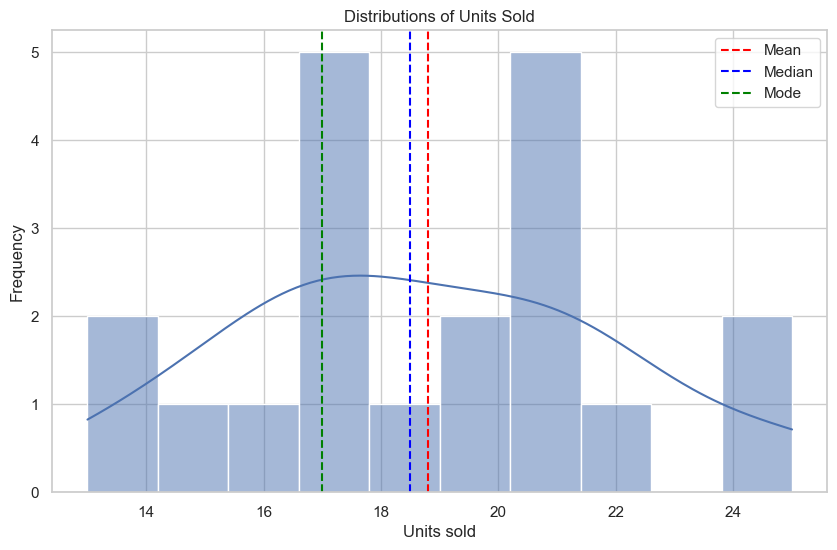

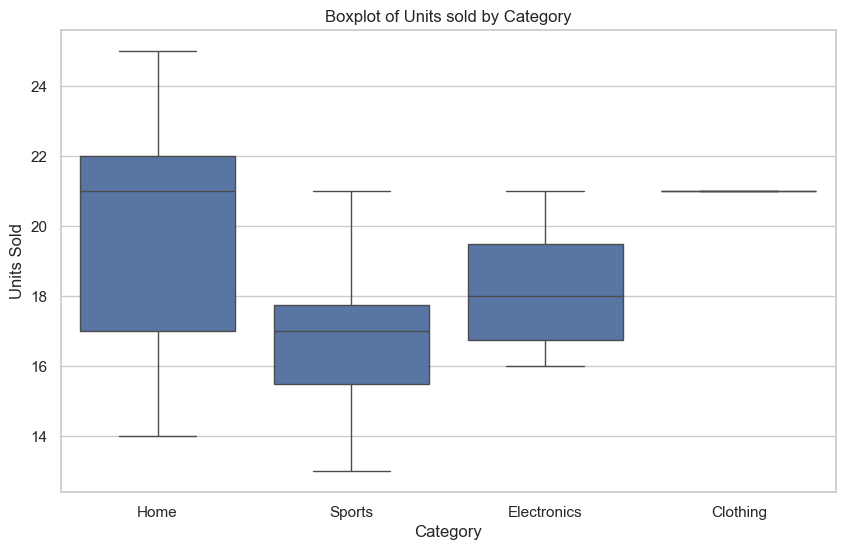

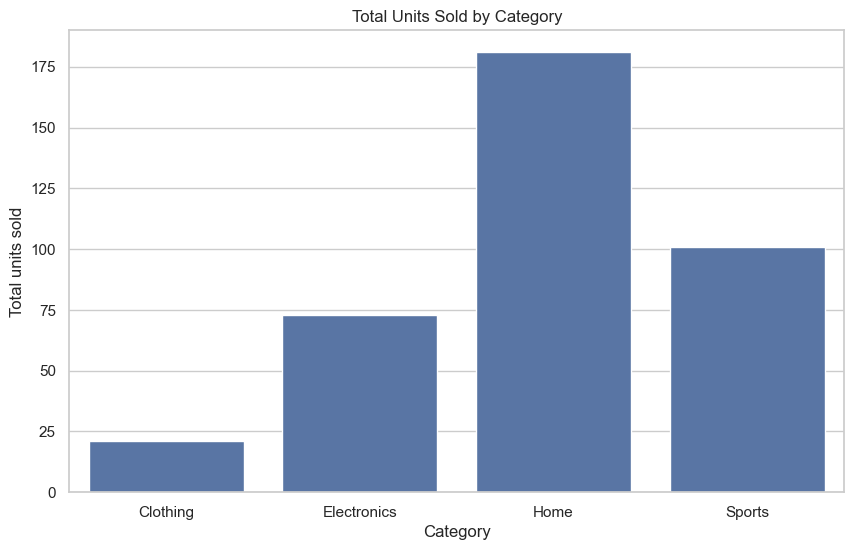

In [32]:
# Visualizations 
sns.set(style ='whitegrid')

# plot distributions of units sold 
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'],bins=10,kde=True)
plt.title('Distributions of Units Sold')
plt.xlabel('Units sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales,color='red',linestyle = '--',label ='Mean')
plt.axvline(median_sales,color='blue',linestyle = '--',label = 'Median')
plt.axvline(mode_sales,color ='green',linestyle = '--',label ='Mode')
plt.legend()
plt.show()

# boxplot for units sold by category 
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='units_sold',data=sales_data)
plt.title('Boxplot of Units sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

# Bar plot for the total units sold by category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y ='Total Units sold',data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total units sold')
plt.show()